<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine, Unit
from sklearn.cluster import AgglomerativeClustering

In [ ]:
am = pd.read_csv('ambulance_runs.csv')

In [ ]:
new = am.loc[am['longitude'] != 0]

In [ ]:
newest = new.loc[new['longitude'] != 0]

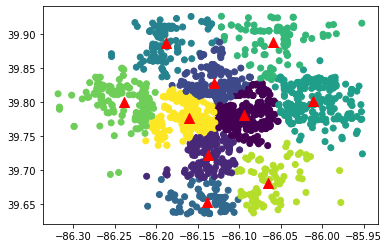

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(newest[['longitude','latitude']])
predictions = kmeans.predict(newest[['longitude','latitude']])
plt.scatter(newest['longitude'],newest['latitude'], c= predictions)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='^',c='red')

In [ ]:
response_times = []
for i in range(10):
    cluster_points = newest[kmeans.labels_ == i]
    cluster_center = kmeans.cluster_centers_[i]
    distances = [haversine(cluster_center, point, unit=Unit.MILES) for point in cluster_points.values]
    avg_distance = sum(distances) / len(distances)
    max_distance = max(distances)
    avg_response_time = avg_distance / 30 * 60
    max_response_time = max_distance / 30 * 60
    response_times.append({'cluster': i+1, 'avg_response_time': avg_response_time, 'max_response_time': max_response_time, 'avg_distance': avg_distance,'max_distance': max_distance })

print('K-means Clustering Response Times (in minutes)')
print(pd.DataFrame(response_times))

K-means Clustering Response Times (in minutes)
   cluster  avg_response_time  max_response_time  avg_distance  max_distance
0        1           2.278444           5.688028      1.139222      2.844014
1        2           1.991042          10.154410      0.995521      5.077205
2        3           2.454767           6.881831      1.227383      3.440915
3        4           2.440900           9.822470      1.220450      4.911235
4        5           2.219402           8.989784      1.109701      4.494892
5        6           3.048738           8.276889      1.524369      4.138444
6        7           3.159489          14.834181      1.579745      7.417090
7        8           3.203431          10.959724      1.601716      5.479862
8        9           2.866392          12.049161      1.433196      6.024581
9       10           1.768856           7.155757      0.884428      3.577878


The average and maximum response times for each cluster can be seen above. Also, you can see the average and maximum distance of each cluster center from the latitude and longitude points assigned to that cluster.

   cluster                            cluster_center  avg_distance  \
0        1   [-86.14058777166228, 39.74264173794195]      1.034983   
1        2  [-86.02117912468279, 39.797282130634436]      1.833267   
2        3   [-86.10263036342657, 39.79146723519814]      1.109654   
3        4   [-86.23124648019419, 39.79431900291262]      1.748636   
4        5   [-86.14495996628318, 39.65553369725663]      1.560008   
5        6   [-86.11466533484851, 39.87905515737374]      1.388075   
6        7   [-86.19410505715685, 39.88640617509804]      0.641366   
7        8   [-86.16209255966825, 39.80607839483412]      0.622232   
8        9   [-86.06783670246375, 39.66782784768115]      1.132171   
9       10  [-86.03879037716666, 39.899395215999995]      1.027399   

   avg_response_time  max_response_time  
0           2.069967           9.149318  
1           3.666534           9.615772  
2           2.219307           6.839393  
3           3.497271          11.991726  
4           3.12001

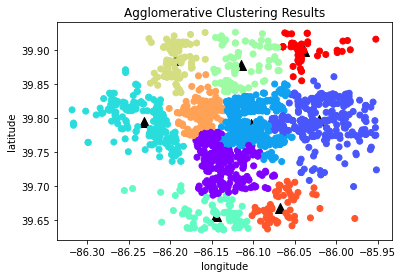

In [ ]:
agg = AgglomerativeClustering(n_clusters=10).fit(newest)

# calculate average and maximum distance and response time for each cluster for agglomerative clustering
response_times = []
for i in range(10):
    cluster_points = newest[agg.labels_ == i]
    cluster_center = cluster_points.mean().values
    distances = [haversine(cluster_center, point, unit=Unit.MILES) for point in cluster_points.values]
    avg_distance = sum(distances) / len(distances)
    max_distance = max(distances)
    avg_response_time = avg_distance / 30 * 60
    max_response_time = max_distance / 30 * 60
    response_times.append({'cluster': i+1, 'cluster_center': cluster_center, 'avg_distance': avg_distance, 'avg_response_time': avg_response_time, 'max_response_time': max_response_time})
    plt.scatter(cluster_center[0],cluster_center[1],s=100,marker='^',c='black')

print(pd.DataFrame(response_times))

plt.scatter(newest['longitude'], newest['latitude'], c=agg.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering Results')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

This neon graph represents the agglomerative clustering. As we can see all data points are in the same locations but the clustering/grouping of data points has changed slightly. The cluster centers have also been recalculated and are in different locations than the K clustering locations above. The cluster centers are the black triangles above, slightly harder to see under some of the data points.

According to the two types of clustering, the one that leads to the best average response time in the worst cluster is agglomerative clustering. This is true because the maximum response time in the worst cluster is 15.22 while the maximum response time in k-clustering is 14.83. The average response time for agglomerative clustering in this worst case is 3.12, while the average response time for k clustering is 3.16. This helps show that even in the worst cases, agglomerative clustering provides a faster average response time. Therefore, the agglomerative clustering method is better to represent where ambulences are placed to reduce response times in the event of an emergency.